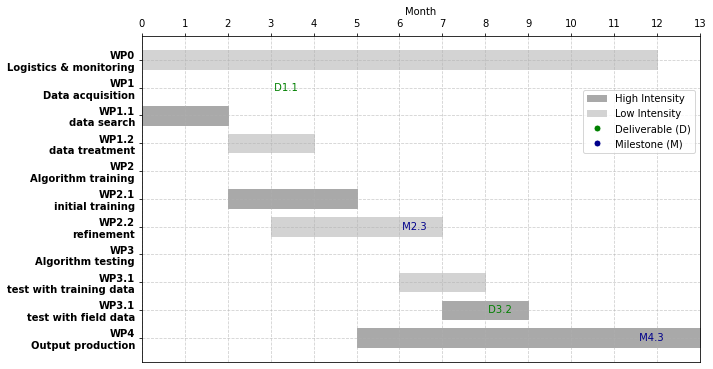

In [4]:

# -----------------------------------
# -- GANTT CHART GENERATION SCRIPT --
# -----------------------------------


# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# ---------------------------
# DATA PREPARATION
# ---------------------------

# Define the work packages and their respective properties
# WP: Work package identifier
# Task: Brief description of the work package
# Start: Start month of the work package
# End: End month of the work package. Take into account the "End" month number includes the whole month
# Intensity: Level of intensity (high/low) of the work package
# Add/delete as many as necessary
work_packages = [
    {"WP": "WP0", "Task": "Logistics & monitoring", "Start": 0, "End": 11, "Intensity": "low"},
    {"WP": "WP1", "Task": "Data acquisition", "Start": np.nan, "End": np.nan, "Intensity": np.nan},
    {"WP": "WP1.1", "Task": "data search", "Start": 0, "End": 1, "Intensity": "high"},
    {"WP": "WP1.2", "Task": "data treatment", "Start": 2, "End": 3, "Intensity": "low"},
    {"WP": "WP2", "Task": "Algorithm training", "Start": np.nan, "End": np.nan, "Intensity": np.nan},
    {"WP": "WP2.1", "Task": "initial training", "Start": 2, "End": 4, "Intensity": "high"},
    {"WP": "WP2.2", "Task": "refinement", "Start": 3, "End": 6, "Intensity": "low"},
    {"WP": "WP3", "Task": "Algorithm testing", "Start": np.nan, "End": np.nan, "Intensity": np.nan},
    {"WP": "WP3.1", "Task": "test with training data", "Start": 6, "End": 7, "Intensity": "low"},
    {"WP": "WP3.1", "Task": "test with field data", "Start": 7, "End": 8, "Intensity": "high"},
    {"WP": "WP4", "Task": "Output production", "Start": 5, "End": 12, "Intensity": "high"}
]
df = pd.DataFrame(work_packages)
df.set_index('WP', inplace=True)
df = df.iloc[::-1]  # Reverse the order of the rows in the DataFrame for plotting purposes

# Define the colors for the intensity of the work packages
color_map = {'high': 'darkgrey', 'low': 'lightgrey'}

# Define the deliverables and milestones associated with the work packages
# Type: Whether it's a Deliverable or Milestone
# Code: Code representation (D for Deliverable, M for Milestone)
# Label: Label of the Deliverable/Milestone
# WP: Associated Work Package
# Month: Month of delivery/milestone
# Add/delete as many as necessary
deliverables_and_milestones = [
    {"Type": "Deliverable", "Code": "D", "Label": "D1.1", "WP": "WP1", "Month": 3},
    {"Type": "Milestone", "Code": "M", "Label": "M2.3", "WP": "WP2.2", "Month": 6},
    {"Type": "Deliverable", "Code": "D", "Label": "D3.2", "WP": "WP3.1", "Month": 8},
    {"Type": "Milestone", "Code": "M", "Label": "M4.3", "WP": "WP4", "Month": 11.5}
]
dm_df = pd.DataFrame(deliverables_and_milestones)

# Define the colors for the deliverables and milestones
color_map_dm = {'D': 'green', 'M': 'darkblue'}

# ---------------------------
# PLOTTING
# ---------------------------

# Create the Gantt chart
fig, ax = plt.subplots(figsize=(10, 6))  # adjust height of the figure

# Generate the bars for each task
yticks = []
labels = []
for i, (idx, row) in enumerate(df.iterrows()):
    start_date = row['Start']
    end_date = row['End']
    if pd.isna(start_date) or pd.isna(end_date):
        color = 'white'  # make bar invisible if there are no defined months
    else:
        color = color_map[row['Intensity']]
    ax.broken_barh([(start_date, end_date-start_date+1)], (i*1.2, 0.8), color=color)  # adjust yrange to further reduce the size of the rows and space between them
    yticks.append(i*1.2+0.4)  # add ytick at the center of the bar
    labels.append(f"{idx}\n{row['Task']}")  # add label

# Generate the labels for each deliverable and milestone
for i in range(len(dm_df)):
    wp = dm_df.loc[i, 'WP']
    month = dm_df.loc[i, 'Month']
    label = dm_df.loc[i, 'Label']
    code = dm_df.loc[i, 'Code']
    color = color_map_dm[code]
    y = df.reset_index().index[df.reset_index()['WP'] == wp].tolist()[0] * 1.2 + 0.4  # get the corresponding y-coordinate from the WP
    ax.text(month, y, ' '+label, color=color, verticalalignment='center')  # add the colored label

# Set labels and title
ax.xaxis.tick_top()  # set the x-axis labels to the top
ax.set_xlabel('Month')
ax.xaxis.set_label_position('top')  # set the x-axis label to the top
ax.set_yticks(yticks)  # set yticks
ax.set_yticklabels(labels, ha='right', fontweight='bold', fontsize=10)  # set labels aligned to the right with the upper line in bold

# Show all four borders
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)

# Format x-axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xlim(left=0, right=df['End'].max()+1)  # start the x-axis at month 0 and end it at the last month
ax.grid(True, linestyle='--', alpha=0.6)

# Add a legend
legend_elements = [
    Patch(facecolor='darkgrey', label='High Intensity'),
    Patch(facecolor='lightgrey', label='Low Intensity'),
    Line2D([0], [0], marker='o', color='w', label='Deliverable (D)', markerfacecolor='green', markersize=7),
    Line2D([0], [0], marker='o', color='w', label='Milestone (M)', markerfacecolor='darkblue', markersize=7)
]
legend = ax.legend(handles=legend_elements, bbox_to_anchor=(1, 1))  # set legend at the upper right corner
legend._legend_box.align = "left"  # align legend text to the left

# Move the legend to the upper third of the graph
bb = legend.get_bbox_to_anchor().transformed(ax.transAxes.inverted())
bb.y0 -= 0.15
bb.y1 -= 0.15
legend.set_bbox_to_anchor(bb, transform=ax.transAxes)

# Save the chart. Select your prefered location
plt.savefig('/home/user/Desktop/gantt_chart.png', dpi=300, bbox_inches='tight')
plt.savefig('/home/user/Desktop/gantt_chart.svg', dpi=300, bbox_inches='tight')

plt.show()